In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense , Dropout, Flatten,MaxPooling2D


import matplotlib.pyplot as plt

c:\Users\wilsen\OneDrive\Desktop\image classification\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\wilsen\OneDrive\Desktop\image classification\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\wilsen\OneDrive\Desktop\image classification\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorfl

In [2]:
file_location = r"C:\Users\wilsen\OneDrive\Desktop\image classification\flowers/"
count = 0
fetch_images = os.listdir(file_location)
for images_in_files in fetch_images:
    files = list(os.listdir(file_location + images_in_files))
    count += len(files)
    print(images_in_files + " have " + str(len(files)) + " total")
print("total_amount = " + str(count))

daisy have 764 total
dandelion have 1052 total
rose have 784 total
sunflower have 733 total
tulip have 984 total
total_amount = 4317


In [3]:
base_dir = r"C:\Users\wilsen\OneDrive\Desktop\image classification\flowers/"
img_size = 180
batch = 32

In [4]:
trains_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                        seed = 123,
                                                        validation_split = 0.2,
                                                        subset = "training",
                                                        batch_size = batch,
                                                        image_size = (img_size,img_size))

validation_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                        seed = 123,
                                                        validation_split = 0.2,
                                                        subset = "validation",
                                                        batch_size = batch,
                                                        image_size = (img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [5]:
flower_names = trains_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

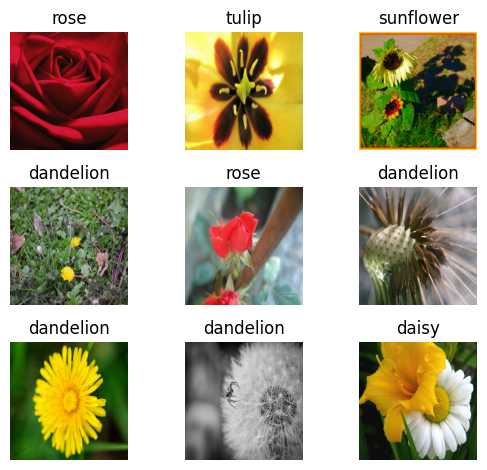

In [58]:
plt.Figure(figsize=(15,15))
for images,labels in trains_ds.take(1):
    for i in range(0,9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("int"))
        plt.title(flower_names[labels[i]])
        plt.axis("off")
        plt.tight_layout()
      


In [7]:
autotune = tf.data.AUTOTUNE


In [65]:
tf.random.set_seed(42)
#.prefetch(buffer_size = autotune)
trains_ds = trains_ds.cache().shuffle(1000, seed = 42)
validation_ds = trains_ds.cache().prefetch(buffer_size = autotune)

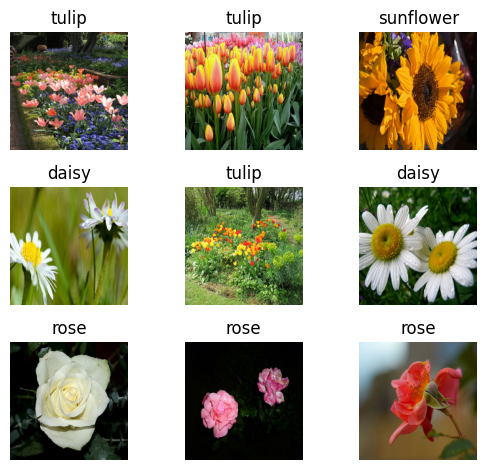

In [71]:
tf.random.set_seed(42)
plt.Figure(figsize=(15,15))
for images,labels in trains_ds.take(1):
    for i in range(0,9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("int"))
        plt.title(flower_names[labels[i]])
        plt.axis("off")
        plt.tight_layout()

In [15]:
data_augmantaion = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

c:\Users\wilsen\OneDrive\Desktop\image classification\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


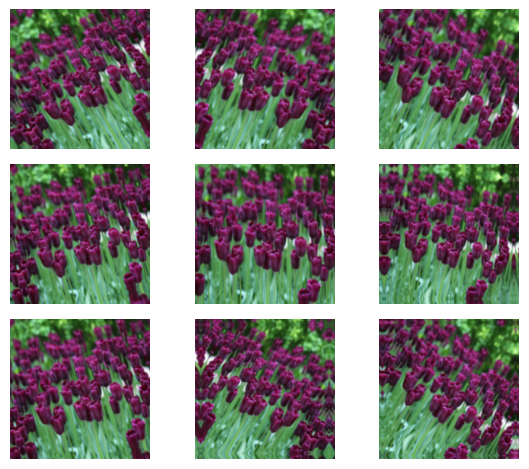

In [16]:

for images,labels in trains_ds.take(1):
    for i in range(0,9):
        new_images = data_augmantaion(images)
        plt.subplot(3, 3, i+1)
        plt.imshow(new_images[0].numpy().astype("int"))
        plt.axis("off")
        plt.tight_layout()
      

In [17]:
model = Sequential([
    data_augmantaion,
    layers.Rescaling(1./255),
    Conv2D(16,3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(32,3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(64,3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(5)
    
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(trains_ds, epochs=10, 
                    validation_data=(trains_ds))

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 26s 230ms/step - accuracy: 0.4230 - loss: 1.3639 - val_accuracy: 0.5411 - val_loss: 1.1186
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.5631 - loss: 1.0828 - val_accuracy: 0.6036 - val_loss: 1.0335
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.6141 - loss: 0.9857 - val_accuracy: 0.6413 - val_loss: 0.9450
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.6491 - loss: 0.9091 - val_accuracy: 0.6595 - val_loss: 0.8755
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 29s 269ms/step - accuracy: 0.6656 - loss: 0.8607 - val_accuracy: 0.6992 - val_loss: 0.8104
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 456ms/step - accuracy: 0.6879 - loss: 0.8218 - val_accuracy: 0.7032 - val_loss: 0.7562
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 208ms/step - accuracy: 0.7041 - loss: 0.7638 - val_accuracy: 0.7426 - val_loss: 0.6918
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.7122 - loss: 0

In [ ]:

input_image = tf.keras.utils.load_img(r"C:\Users\wilsen\OneDrive\Desktop\image classification\flowers\daisy\5547758_eea9edfd54_n.jpg", 
                                      target_size=(180,180))
input_image_array = tf.keras.utils.img_to_array(input_image)
input_image_exp_dmn = tf.expand_dims(input_image_array, 0)


predic = model.predict(input_image_exp_dmn)
result = tf.nn.softmax(predic[0])
acc = np.max(result)*100
flower_names[np.argmax(result)]
print(f"{str(acc)} with and {str(flower_names[np.argmax(result)])}")






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
98.9356 with and daisy


In [72]:
def predict_image(image_link):
    input_image = tf.keras.utils.load_img(image_link, 
                                      target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dmn = tf.expand_dims(input_image_array, 0)
    predic = model.predict(input_image_exp_dmn)
    result = tf.nn.softmax(predic[0])
    acc = np.max(result)*100
    return result,acc

In [75]:
model.save('model_bunga.h5')